In [1]:
from numpy import loadtxt, log, sqrt
import matplotlib.pyplot as plt

In [2]:
data = loadtxt('../datos/decayPiMeson.dat')

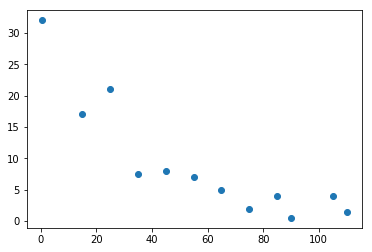

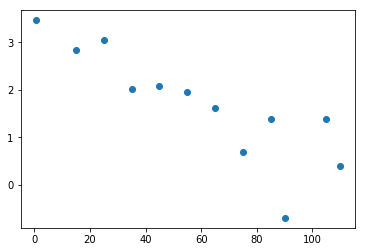

In [3]:
plt.plot(data[:,0], data[:,1], 'o')
plt.show()

plt.plot(data[:,0], log(data[:,1]), 'o')
plt.show()

In [4]:
n = len(data[:,0])
err = sqrt(n)
x_mean = sum(data[:,0]) / n
y_mean = sum(data[:,1]) / n

sxx = 0
sxy = 0

for i in range(len(data[:,0])):
    sxx += (data[i,0]-x_mean)*(data[i,0]-x_mean)
    sxy += (data[i,0]-x_mean)*(log(data[i,1])-x_mean)

sxx /= (err*err)
sxy /= (err*err)

a2 = sxy/sxx
a1 = y_mean-a2*x_mean

y_fit = [ (a2*i+a1) for i in data[:,0] ]

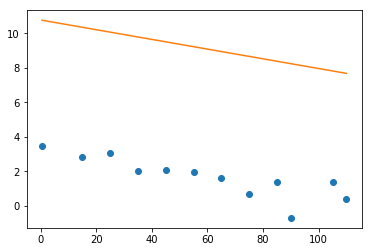

In [5]:
plt.plot(data[:,0], log(data[:,1]), 'o')
plt.plot(data[:,0], y_fit, '-')
plt.show()

In [6]:
s = 0
sx = 0
sy = 0
sxx = 0
sxy = 0
delta = 0

for i in range(len(data[:,0])):
    s += 1/(err*err)
    sx += data[i,0]
    sy += log(data[i,1])
    sxx += ( data[i,0]*data[i,0] )    
    sxy += ( data[i,0]*log(data[i,1]) )
    
sx /= (err*err)
sy /= (err*err)
sxx /= (err*err)
sxy /= (err*err)

delta = s*sxx - (sx*sx)

In [7]:
a = (sxx*sy - sx*sxy) / delta
b = (s*sxy - sx*sy) / delta

y_fit = [ (b*i+a) for i in data[:,0] ]
print(a, b)

3.33420026241 -0.0281207441676


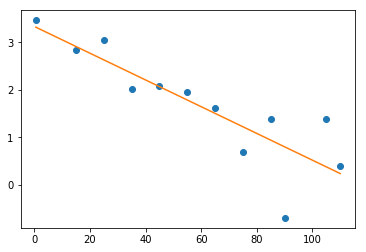

In [8]:
plt.plot(data[:,0], log(data[:,1]), 'o')
plt.plot(data[:,0], y_fit, '-')
plt.show()

In [9]:
dist = [ (log(data[i,1]) - y_fit[i])**2 for i in range(len(data[:,1])) ]
cov = -sx/delta
r = -sx/sqrt(s*sxx)

delta_a = sxx / delta
delta_b = s / delta

print(cov, r, r*r, delta_a, delta_b )

-0.0505817105831 -0.865072616262 0.748350631406 3.97378306803 0.000860355105595


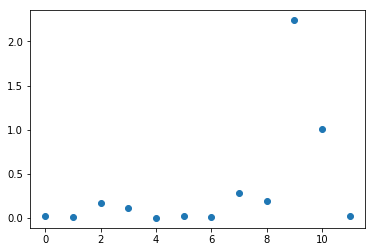

In [10]:
plt.plot(dist, 'o')
plt.show()

In [11]:
from scipy.optimize import curve_fit
from scipy.optimize import leastsq

In [12]:
def f_line(x,a,b):
    return a*x + b

In [13]:
y_log = [log(i) for i in data[:,1]]
popt, pcov = curve_fit(f_line, data[:,0], y_log)

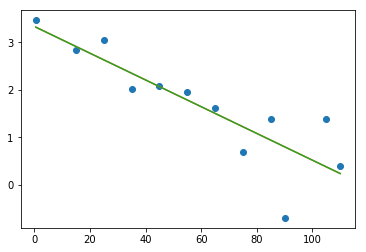

In [14]:
plt.plot(data[:,0], log(data[:,1]), 'o')
plt.plot(data[:,0], f_line(data[:,0], *popt), '-')
plt.plot(data[:,0], y_fit, '-')
plt.show()

In [19]:
print(popt, pcov)
print( sqrt(pcov[0,0]), sqrt(pcov[1,1]) )

x_2 = [(data[i,1]-f_line(data[i,0], *popt))**2 for i in range(len(data[:,1]))]
print(sum(x_2)/err**2)

x_2 = [(log(data[i,1])-y_fit[i])**2 for i in range(len(data[:,1]))]
print(sum(x_2)/err**2)

[ -2.97207563e-02   3.18390263e+01] [[  1.28323152e-05  -5.50777383e-03]
 [ -5.50777383e-03   6.33876107e+00]]
0.00358222210911 2.51768963016
507.128298177
0.341766978541


In [20]:
from numpy import exp as npexp

def f_exp(x, a, b):
    return b*npexp(a*x)

p0 = [-0.01, npexp(3.33)]
popt, pcov = curve_fit(f_exp, data[:,0], data[:,1], p0)
print(popt)
print(pcov)

[ -2.97207563e-02   3.18390263e+01]
[[  1.28323152e-05  -5.50777383e-03]
 [ -5.50777383e-03   6.33876107e+00]]


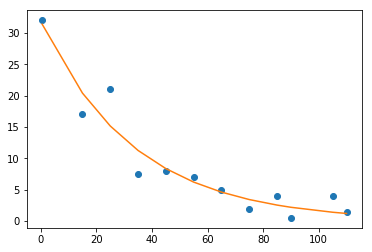

In [21]:
plt.plot(data[:,0], data[:,1], 'o')
plt.plot(data[:,0], f_exp(data[:,0], *popt), '-')
plt.show()

In [22]:
x_2 = [(data[i,1]-f_exp(data[i,0], *popt))**2 for i in range(len(data[:,1]))]
print(sum(x_2)/err**2)

6.24672408722
